<a href="https://colab.research.google.com/github/Nisha-Bagdwal/IT7103-Practical-Data-Analytics/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

auto_mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/auto-mpg.csv')
auto_mpg.head()

Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Diplaying the number of rows and number of columns of the full data set.

In [2]:
auto_mpg.shape

(398, 9)

In [3]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


The data type of origin seems incorrect, origin represents categorical data(the development location of the car (number codes represent Asia, Europe, and North America)). So converting its data type to object.

And, keeping the data type of model year as integer as it might help to represent the quality of the car, for example, more recent models are better built.

In [4]:
auto_mpg['origin'] = auto_mpg['origin'].astype(object)
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Now, splitting the data into 75% training and 25% testing.

In [5]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(auto_mpg, test_size=0.25)
traindata.shape, testdata.shape

((298, 9), (100, 9))

In [6]:
traindata.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,298.000000,298.000000,298.000000,294.000000,298.000000,298.000000,298.000000
mean,23.154027,5.557047,198.953020,106.068027,3020.043624,15.502349,75.973154
std,7.782420,1.711056,103.824012,38.776714,837.804491,2.721772,3.727135
min,9.000000,3.000000,70.000000,46.000000,1649.000000,8.500000,70.000000
25%,17.000000,4.000000,108.000000,76.000000,2264.250000,13.625000,73.000000
50%,22.000000,5.000000,151.000000,95.000000,2902.000000,15.500000,76.000000
75%,28.000000,8.000000,302.000000,130.000000,3660.750000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000


To further observe the distribution, plotting histograms and boxplots.

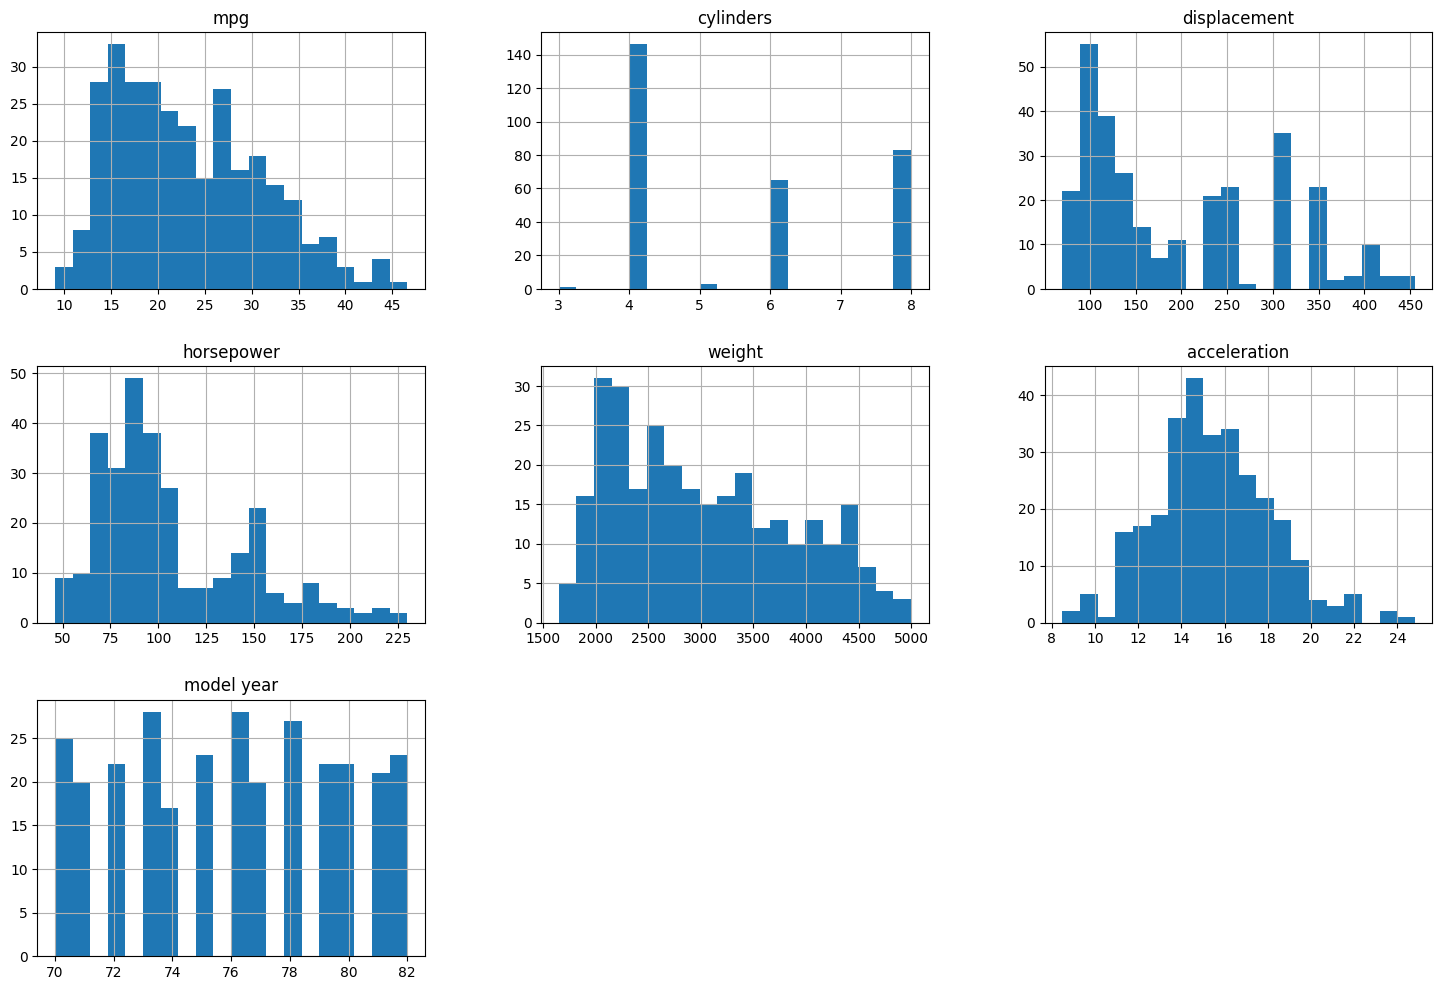

In [7]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(18,12))
plt.show()

Filtering numerical columns for boxplots.

In [8]:
num_cols = [column for column in auto_mpg.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

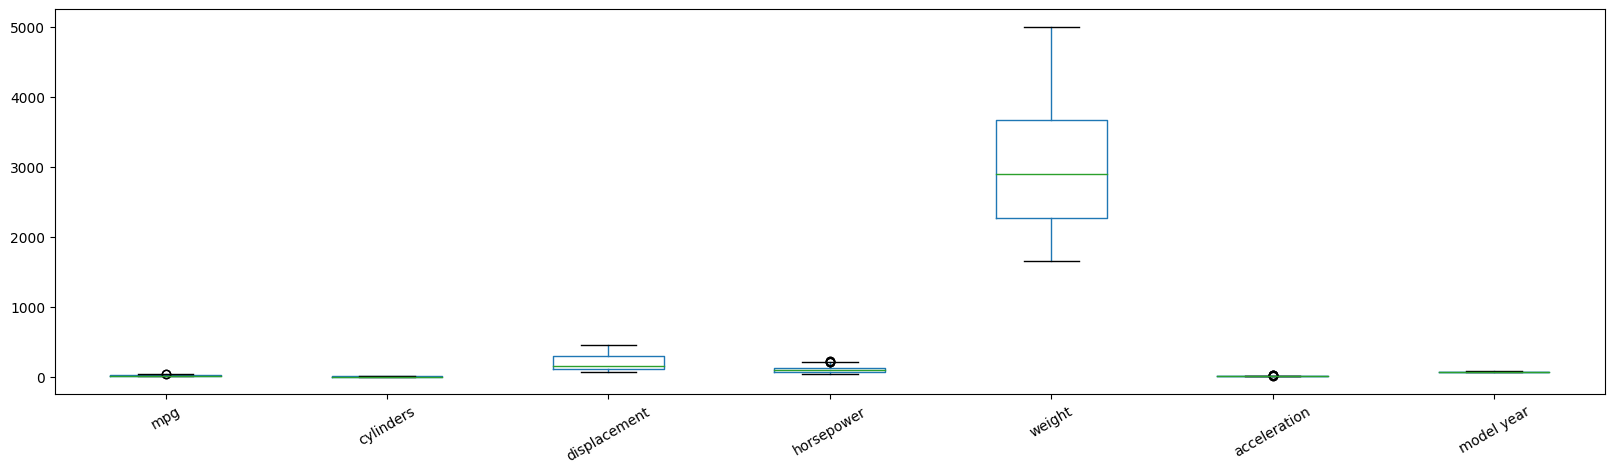

In [9]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

It is visible from the boxplots that the numerical columns have very different ranges, they need to be standardized.

Filtering categorical columns.

In [10]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['origin', 'car name']

Drawing a bar chart for each column

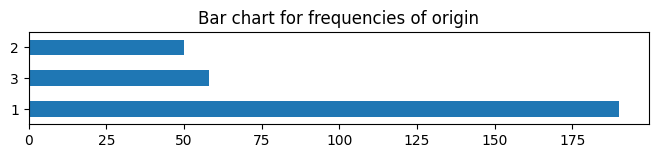

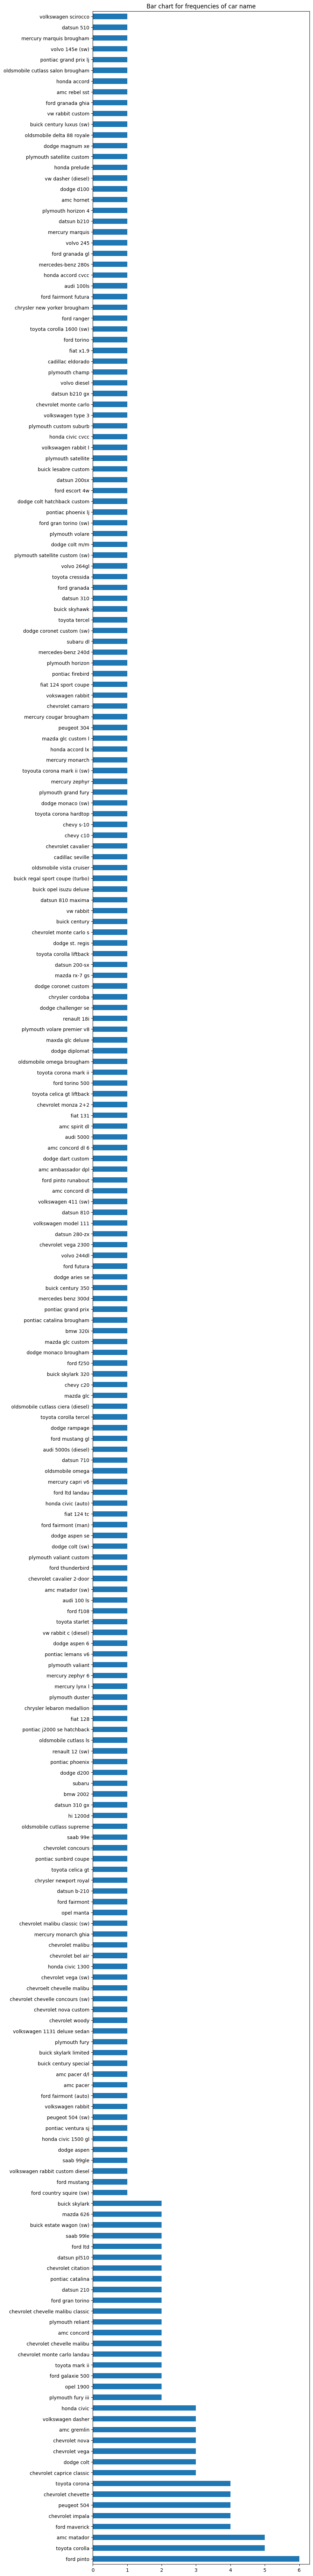

In [11]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.4))
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

As we can see in the bar chart, column car name has too many categories with too few instances each, it wouldn't be of much interest. So, I will remove this column in preprocessing.

**Preprocessing**

The data will be transformed as follows:

•	Numeric and symmetric columns: 	**Imputation -> Standardization**

•	Numeric and skewed columns:		**Imputation -> Log transformation** **-> Standardization**

•	Categorical columns: 			**One hot encoder**

So I am listing the columns for each type of transformation. Here, any columns that are not listed will be dropped from the processed data. Therefore, I will not list car name.

In [12]:
num_cols = ['cylinders', 'acceleration', 'model year']                           # Numeric and symmetric columns
log_cols = ['mpg', 'displacement', 'horsepower', 'weight']                       # Numeric and skewed columns
cat_cols = ['origin']                                                            # Categorical columns

In [13]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           # pipeline for numeric and symmetric columns
    ('impute', SimpleImputer(strategy='median')),   # impute missing values using column medians
    ('standardize', StandardScaler())               # scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        # pipeline for numeric and skewed columns
    ('impute', SimpleImputer(strategy='median')),                # impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)),  # include a log transformation into the pipeline
    ('standardize', StandardScaler())                            # scale all numeric log columns
])

processing_pipeline = ColumnTransformer([                                                      # merge the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       # numeric columns
    ('log', log_pipeline, log_cols),                                                           # numeric log columns
    ('class', OneHotEncoder(max_categories=3, handle_unknown='infrequent_if_exist'), cat_cols) # encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [14]:
processing_pipeline.fit(traindata)        # training the pipeline on the training data.

train_processed = processing_pipeline.transform(traindata)  # performing transformation on the training data.
test_processed = processing_pipeline.transform(testdata)   # performing transformation on the testing data.


Printing the shape of the processed training and testing data.

In [15]:
print(f"Shape of training data : {train_processed.shape}")
print(f"Shape of testing data : {test_processed.shape}")

Shape of training data : (298, 10)
Shape of testing data : (100, 10)
